## Esempi di base con Pandas

Questo notebook ti guiderà attraverso alcuni concetti molto basilari di Pandas. Inizieremo importando le librerie tipiche per la data science:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Serie

La serie è simile a una lista o un array monodimensionale, ma con un indice. Tutte le operazioni sono allineate agli indici.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Uno degli utilizzi frequenti delle serie è **serie temporali**. Nelle serie temporali, l'indice ha una struttura speciale - tipicamente un intervallo di date o datetime. Possiamo creare un indice di questo tipo con `pd.date_range`.

Supponiamo di avere una serie che mostra la quantità di prodotto acquistata ogni giorno, e sappiamo che ogni domenica dobbiamo anche prendere un articolo per noi stessi. Ecco come modellare questa situazione usando le serie:


Length of index is 366


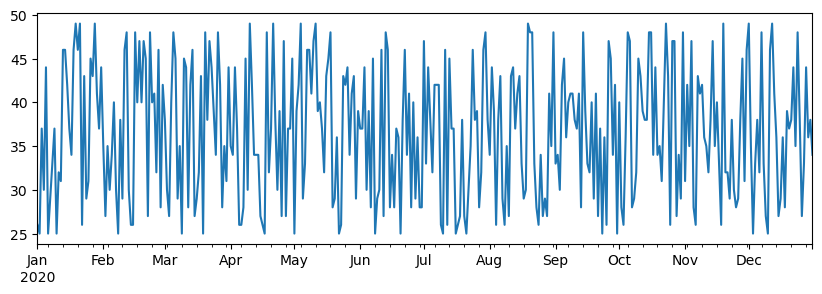

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Come puoi vedere, stiamo riscontrando problemi qui, perché nei dati settimanali i giorni non menzionati sono considerati mancanti (`NaN`), e aggiungere `NaN` a un numero ci dà `NaN`. Per ottenere il risultato corretto, dobbiamo specificare `fill_value` quando sommiamo le serie:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


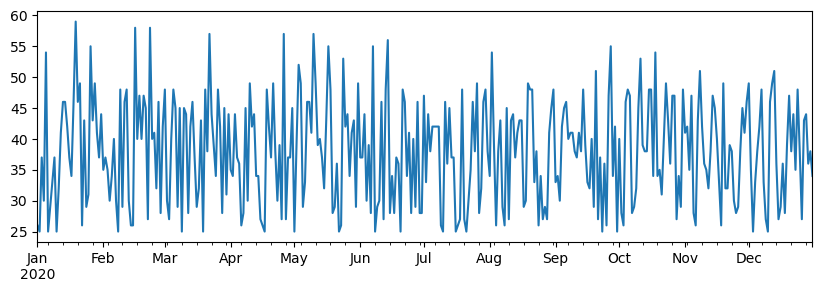

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

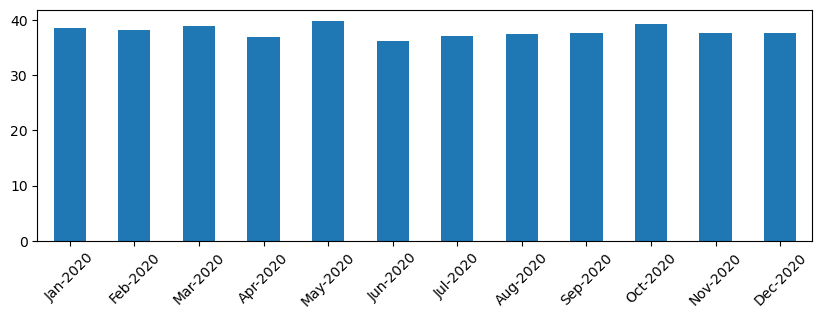

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

Un dataframe è essenzialmente una raccolta di serie con lo stesso indice. Possiamo combinare diverse serie insieme in un dataframe. Date le serie `a` e `b` definite sopra:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Possiamo anche usare Series come colonne e specificare i nomi delle colonne usando un dizionario:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Lo stesso risultato può essere ottenuto trasponendo (e poi rinominando le colonne, per corrispondere all'esempio precedente):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Selezionare colonne** da DataFrame può essere fatto così:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Selezione delle righe** basata sull'espressione di filtro:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

Il funzionamento è che l'espressione `df['A']<5` restituisce una serie booleana, che indica se l'espressione è `True` o `False` per ciascun elemento della serie. Quando la serie viene utilizzata come indice, restituisce un sottoinsieme di righe nel DataFrame. Pertanto, non è possibile utilizzare un'espressione booleana arbitraria di Python, ad esempio, scrivere `df[df['A']>5 and df['A']<7]` sarebbe sbagliato. Invece, dovresti utilizzare l'operazione speciale `&` sulle serie booleane:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**Creazione di nuove colonne computabili**. Possiamo facilmente creare nuove colonne computabili per il nostro DataFrame utilizzando espressioni intuitive. Il codice seguente calcola la divergenza di A dal suo valore medio.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Quello che succede in realtà è che stiamo calcolando una serie e poi assegnando questa serie al lato sinistro, creando un'altra colonna.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**Selezionare righe basate su numeri** può essere fatto utilizzando la struttura `iloc`. Ad esempio, per selezionare le prime 5 righe dal DataFrame:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Raggruppamento** viene spesso utilizzato per ottenere un risultato simile alle *tabelle pivot* in Excel. Supponiamo di voler calcolare il valore medio della colonna `A` per ogni numero dato di `LenB`. Possiamo quindi raggruppare il nostro DataFrame per `LenB` e chiamare `mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Se dobbiamo calcolare la media e il numero di elementi nel gruppo, allora possiamo usare la funzione `aggregate` più complessa:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Stampa e Grafici

Un Data Scientist deve spesso esplorare i dati, quindi è importante essere in grado di visualizzarli. Quando un DataFrame è grande, molte volte vogliamo semplicemente assicurarci di fare tutto correttamente stampando le prime righe. Questo può essere fatto chiamando `df.head()`. Se lo esegui da Jupyter Notebook, stamperà il DataFrame in una bella forma tabellare.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Abbiamo anche visto l'utilizzo della funzione `plot` per visualizzare alcune colonne. Sebbene `plot` sia molto utile per molti compiti e supporti diversi tipi di grafici tramite il parametro `kind=`, puoi sempre utilizzare la libreria `matplotlib` direttamente per creare grafici più complessi. Tratteremo la visualizzazione dei dati in dettaglio in lezioni separate del corso.


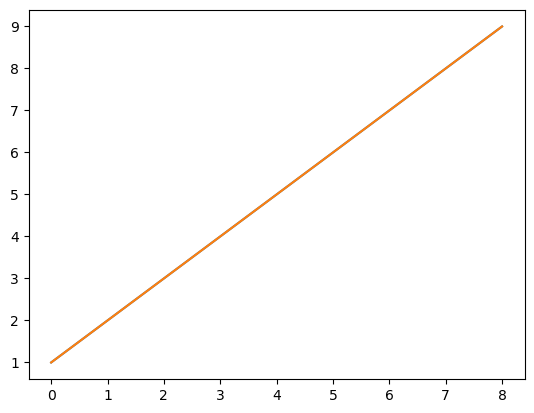

In [61]:
df['A'].plot()
plt.show()

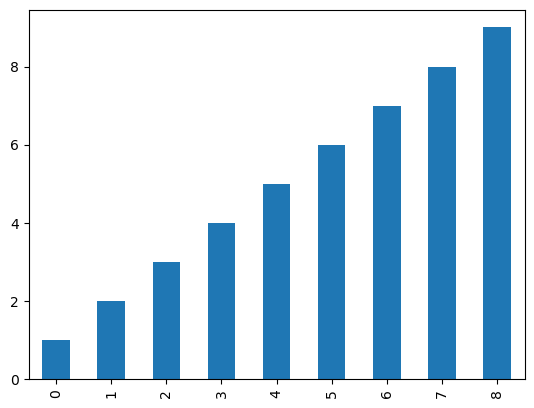

In [63]:
df['A'].plot(kind='bar')
plt.show()

Questa panoramica copre i concetti più importanti di Pandas, tuttavia la libreria è molto ricca e non ci sono limiti a ciò che puoi fare con essa! Applichiamo ora questa conoscenza per risolvere un problema specifico.



---

**Disclaimer**:  
Questo documento è stato tradotto utilizzando il servizio di traduzione automatica [Co-op Translator](https://github.com/Azure/co-op-translator). Sebbene ci impegniamo per garantire l'accuratezza, si prega di notare che le traduzioni automatiche possono contenere errori o imprecisioni. Il documento originale nella sua lingua nativa dovrebbe essere considerato la fonte autorevole. Per informazioni critiche, si raccomanda una traduzione professionale effettuata da un traduttore umano. Non siamo responsabili per eventuali incomprensioni o interpretazioni errate derivanti dall'uso di questa traduzione.
